In [28]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from utility_functions import bass_model

In [29]:
df = pd.read_csv("data/ebook_sales_modified.csv", skiprows=3, header=None, sep=";")

df.columns = ["Year", "Number of Unit Sales (in million units)"]

df["Year"] = pd.to_numeric(df["Year"])
df["Number of Unit Sales (in million units)"] = pd.to_numeric(df["Number of Unit Sales (in million units)"])

df["CumulativeSales"] = df["Number of Unit Sales (in million units)"].cumsum()
df

,Year,Number of Unit Sales (in million units),CumulativeSales
0,2010,69,69
1,2011,165,234
2,2012,215,449
3,2013,242,691
4,2014,234,925
5,2015,204,1129
6,2016,181,1310
7,2017,173,1483
8,2018,168,1651
9,2019,170,1821


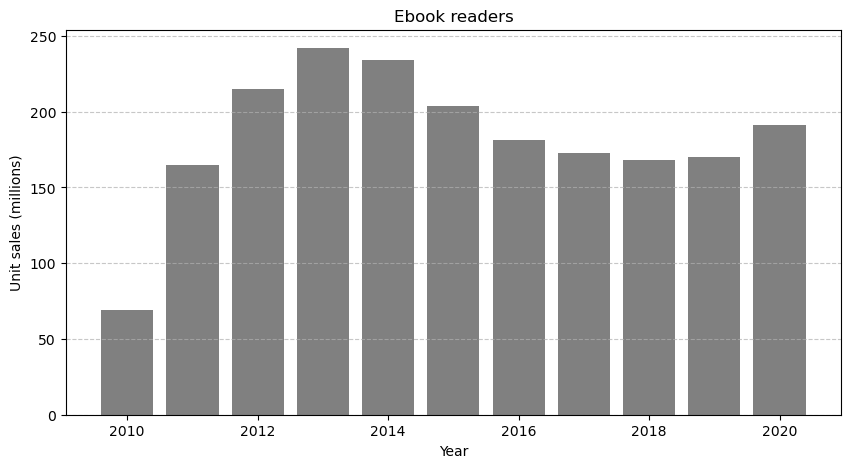

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(df["Year"], df["Number of Unit Sales (in million units)"], color="grey")
plt.xlabel("Year")
plt.ylabel("Unit sales (millions)")
plt.title("Ebook readers")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [31]:
initial_guess = [0.01, 0.1, df["CumulativeSales"].max() * 1.2]
bounds = ([0, 0, 0], [1, 1, df["CumulativeSales"].max() * 2])
params, _ = curve_fit(bass_model, df["Year"], df["Number of Unit Sales (in million units)"],
                      p0=initial_guess, bounds=bounds)
p, q, M = params

In [32]:
print(f"Estimated Innovation Coefficient (p): {p:.4f}")
print(f"Estimated Imitation Coefficient (q): {q:.4f}")
print(f"Estimated Market Potential (M): {M:.4f}")

Estimated Innovation Coefficient (p): 0.0100
Estimated Imitation Coefficient (q): 0.1000
Estimated Market Potential (M): 2414.4000


In [33]:
years = df['Year']
years = np.array(years)
years = years[years <= 2020]

M = 3018.0000
F_t = np.zeros(len(years))
S_t = np.zeros(len(years))

F_t[0] = 0.001

for t in range(1, len(years)):
    F_t[t] = F_t[t - 1] + (p + q * F_t[t - 1]) * (1 - F_t[t - 1])
    S_t[t] = M * (F_t[t] - F_t[t - 1])

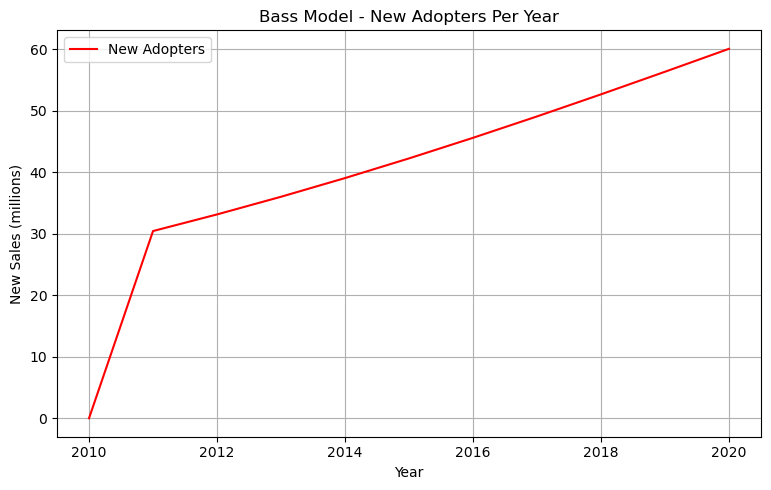

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(years, S_t, label="New Adopters", color="red")
plt.xlabel("Year")
plt.ylabel("New Sales (millions)")
plt.title("Bass Model - New Adopters Per Year")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [35]:
df['Year'] -= df['Year'].min()

params, _ = curve_fit(bass_model, df['Year'], df['Number of Unit Sales (in million units)'], p0=[0.03, 0.38, 16000])
p, q, M = params
print(f"Estimated Parameters: p={p:.4f}, q={q:.4f}, M={M:.2f}")

Estimated Parameters: p=0.0536, q=0.2173, M=2554.59


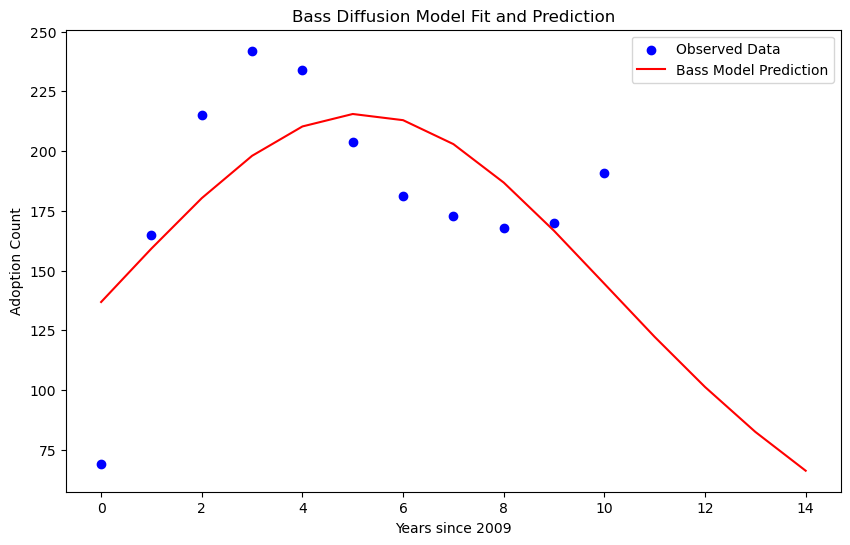

In [36]:
years_future = np.arange(0, 15)
predicted = bass_model(years_future, p, q, M)

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Number of Unit Sales (in million units)'], label='Observed Data', color='blue')
plt.plot(years_future, predicted, label='Bass Model Prediction', color='red')
plt.xlabel('Years since 2009')
plt.ylabel('Adoption Count')
plt.legend()
plt.title('Bass Diffusion Model Fit and Prediction')

plt.show()

Fermi's Logik

In [37]:
M = 3_300_000  # Assuming 3.3 million potential adopters as in US population is 330mln in 2020

p = 0.02
q = 0.4
years = np.arange(2010, 2021)

F_t = np.zeros(len(years))
S_t = np.zeros(len(years))
F_t[0] = 0.001

In [38]:
for t in range(1, len(years)):
    F_t[t] = F_t[t - 1] + (p + q * F_t[t - 1]) * (1 - F_t[t - 1])
    S_t[t] = M * (F_t[t] - F_t[t - 1])  #

print("Estimated New Adopters Per Year:")
for t in range(len(years)):
    print(f"Year: {years[t]}, New Adopters: {S_t[t]:,.0f}")

Estimated New Adopters Per Year:
Year: 2010, New Adopters: 0
Year: 2011, New Adopters: 67,253
Year: 2012, New Adopters: 92,207
Year: 2013, New Adopters: 124,638
Year: 2014, New Adopters: 165,199
Year: 2015, New Adopters: 213,157
Year: 2016, New Adopters: 265,262
Year: 2017, New Adopters: 314,720
Year: 2018, New Adopters: 351,276
Year: 2019, New Adopters: 363,719
Year: 2020, New Adopters: 345,082


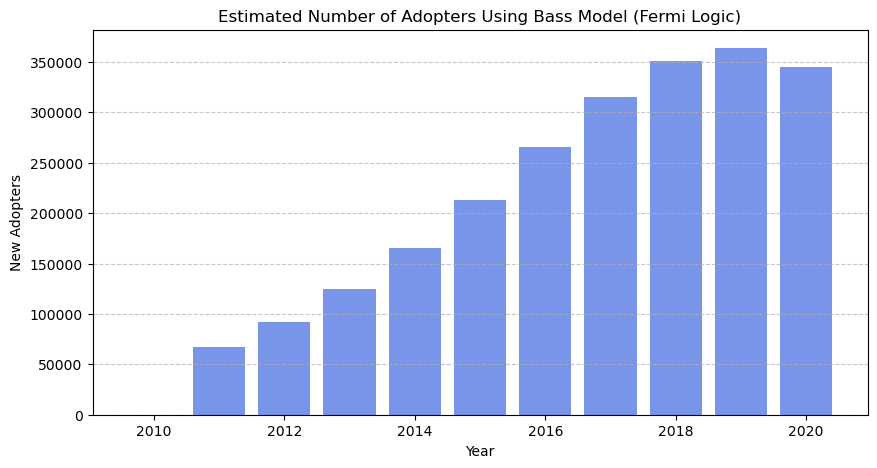

In [39]:
plt.figure(figsize=(10, 5))
plt.bar(years, S_t, color="royalblue", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("New Adopters")
plt.title("Estimated Number of Adopters Using Bass Model (Fermi Logic)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()